<a href="https://colab.research.google.com/github/TetianaZabolotko/MLtrainings/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST

In [ ]:
import numpy as np
import os

In [ ]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [ ]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))




Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset




In [ ]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# mnist = fetch_openml("mnist_784")

X, y = mnist['data'],mnist['target']
X,y

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))


*   A DESCR key describing the dataset

*    A data key containing an array with one row per instance and one column per
feature

* A target key containing an array with the labels

In [ ]:
print(type(X))

<class 'numpy.ndarray'>


In [ ]:
print(type(y))

<class 'numpy.ndarray'>


In [ ]:
X.shape

(70000, 784)

There are 70,000 images, and each image has 784 features. This is because each image
is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0
(white) to 255 (black).

In [ ]:
# X['pixel1']

In [ ]:
# X['pixel1'].values

In [ ]:
# X['pixel1'].values.shape

In [ ]:
# X[['pixel1']]

In [ ]:
# X[['pixel1']].values

In [ ]:
# X[['pixel1']].values.shape

In [ ]:
# X.iloc[5].values.shape

In [ ]:
# X.iloc[[5]].values.shape

In [ ]:
# X.iloc[[5]].values[:,3]

Let’s take a peek at one digit from the dataset

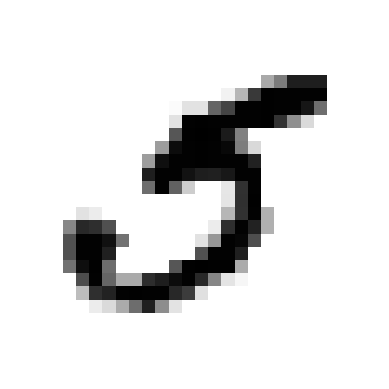

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]

some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

 The **`reshape`**  *in NumPy is used to change the shape (dimensions) of
an array* **without changing its data**.
It returns a new array with the specified shape

 **`arr.reshape`**((2, 3)) *is equivalent to* **`np.reshape`**(arr, (2, 3))


---


**`imshow`** is a function in the Matplotlib library used to display images or 2D arrays as images.

* X: The input image or 2D array to be displayed.
* cmap: (Optional) The colormap to be used for mapping scalar data to colors. If not specified, the default colormap ('viridis') is used.
* Other optional parameters: There are many additional optional parameters you can use to customize the appearance of the image, such as aspect, interpolation, vmin, vmax, etc. These parameters control aspects like the aspect ratio, interpolation method, and color range.

In [ ]:
y[36000]

5

The MNIST dataset is actually already split into a training set (the first 60,000
images) and a test set (the last 10,000 images):

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

Let’s also shuffle the training set; this will guarantee that all cross-validation folds will
be similar (you don’t want one fold to be missing some digits)

In [ ]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train

array([8, 7, 5, ..., 4, 0, 2], dtype=int8)

In [ ]:
shuffle_index

array([50029, 47809, 35783, ..., 26518,  3879, 14449])

# Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example,
the number 5. This “5-detector” will be an example of a binary classifier, capable of
distinguishing between just two classes, 5 and not-5.

In [ ]:
# y_train = y_train.astype(np.int8)
# y_test = y_test.astype(np.int8)
y_train_5 = (y_train == 5) # True for all 9s, False for all other digits
y_test_5 = (y_test == 5)

A good place to start is with a **Stochastic
Gradient Descent (SGD)** classifier, using Scikit-Learn’s **SGDClassifier class**. This classifier has the advantage of being capable of handling very large datasets efficiently.

The SGDClassifier relies on randomness during training (hence
the name “stochastic”). If you want reproducible results, you
should set the random_state parameter.

In [ ]:
np.unique(y_train_5)

array([False,  True])

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
y_train.dtype


dtype('int8')

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

**max_iter:**
* This parameter defines the maximum number of iterations (epochs) that the stochastic gradient descent (SGD) optimization algorithm will run during training.
* An iteration in SGD refers to one update of the model's parameters based on a single training example.
* If the optimization algorithm hasn't converged after max_iter iterations, it will stop, even if the convergence criteria haven't been met.
In your example, max_iter=5 means that the training process will iterate over the entire dataset five times.

**tol:**
* This parameter sets the tolerance for the stopping criterion during training.
The algorithm stops training when the improvement in the loss function is less than this value.
* Setting tol=-np.infty effectively disables this stopping criterion, meaning that training will continue for max_iter iterations regardless of the improvement in the loss function.
* By setting tol=-np.infty, you're ensuring that the algorithm runs for exactly max_iter iterations, regardless of the convergence criteria.

**random_state:**
* This parameter sets the seed for the random number generator used by the algorithm.
* It ensures that the random initialization of the model's parameters and the shuffling of the data during training are reproducible across different runs.
* Setting a specific random_state value (e.g., random_state=42) ensures that you get the same results if you run the code multiple times with the same dataset and parameters.

In summary, **max_iter** controls the number of iterations for training, **tol** sets the stopping criterion for convergence (but it's disabled in this case), and **random_state** ensures reproducibility of results across different runs. These parameters are used to **fine-tune the training process** and ensure consistent results.

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

Occasionally you will need more control over the cross-validation process than what
cross_val_score() and similar functions provide.

The StratifiedKFold class performs stratified sampling
to produce folds that contain a representative ratio of each class

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95575, 0.9498 , 0.9697 ])

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = (y_train_5[train_index])
  X_test_folds = X_train[test_index]
  y_test_folds = (y_train_5[test_index])

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  print(y_pred)
  n_correct = sum(y_pred == y_test_folds)
  print(n_correct)
  print(n_correct/len(y_pred))




[False False False ... False False False]
19171
0.95855
[False False False ... False False False]
19268
0.9634
[False  True False ... False False False]
19266
0.9633


When you define a custom estimator by subclassing **BaseEstimator**, you need to **implement** at least two methods: **fit and predict.**

let’s look at a very
dumb classifier that just classifies every single image in the “not-5” class

In [ ]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

That’s right, it has over 90% accuracy! This is simply because only about 10% of the
images are 5s, so if you always guess that an image is not a 5, you will be right about
90% of the time. Beats Nostradamus.
This demonstrates why accuracy is generally not the preferred performance measure
for classifiers, especially when you are dealing with skewed datasets (i.e., when some
classes are much more frequent than others)

In [ ]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9101 , 0.91255, 0.9063 ])

In [ ]:
np.zeros([3,2], dtype=bool)

array([[False, False],
       [False, False],
       [False, False]])

# Confusion Matrix

Just like the cross_val_score() function, cross_val_predict() performs K-fold
cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

you are ready to get the confusion matrix using the confusion_matrix() func‐
tion. Just pass it the target classes (y_train_5) and the predicted classes
(y_train_pred):

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52954,  1625],
       [  870,  4551]])

Each row in a confusion matrix represents an**`actual class`**, while each column represents a **`predicted class`**

```
[ True Negative    False Positive]
[ False Negative   True Positive ]
```



In [ ]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

The accuracy of the positive predictions is called the **```precision```** of the classifier



```
              TP
precision = -------
            TP + FP
```



A trivial way to have perfect precision is to make one single positive prediction and
ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the
classifier would ignore all but one positive instance. So precision is typically used
along with another metric named **```recall```**, also called **```sensitivity```** or **```true positive rate
(TPR)```**: this is the ratio of positive instances that are correctly detected by the classifier

```
            TP
recall = ---------
          TP + FN
```

# Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7368847150259067

In [ ]:
4351/(1348+4351)

0.7634672749605194

In [ ]:
recall_score(y_train_5, y_train_pred)

0.8395130049806309

In [ ]:
4351/(1070+4351)

0.8026194429072127

It claims an image represents a 5, it is correct only 87% of the time. Moreover,
it only detects 71% of the 5s.

It is often convenient to combine precision and recall into a single metric called the F1
score, in particular if you need a simple way to compare two classifiers. The F1 score is
the harmonic mean of precision and recall. Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values.
As a result, the classifier will only get a high F1 score if both recall and precision are
high.

```
               2
F1 = ------------------
         1          1
      --------- + -----
      precision   recall



In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7848581529705959

# Precision/Recall Tradeoff

For each instance, it computes a score based on a **decision function**,
and if that score is greater than a **threshold**, it assigns the instance to the positive
class, or else it assigns it to the negative class.

Instead of calling the classifier’s
predict() method, you can call its decision_function() method, which returns a
score for each instance

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([87185.79587364])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
result as the predict() method (i.e., True). Let’s raise the threshold

In [ ]:
threshold = 250000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 200,000.

For decision which threshold to use  first need to get the
scores of all instances in the training set using the `cross_val_predict()` function
again, but this time specifying that you want it to return decision scores instead of
predictions:

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")
print('min: {}, max {}'.format(y_scores.min(),y_scores.max()))

min: -2900640.9326189877, max 1113527.5880675567


With these scores you can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [ ]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
#precisions.shape
precisions.max()

1.0

In [ ]:
recalls.shape

(59816,)

In [ ]:
precisions[:-1].shape

(59815,)

In [ ]:
thresholds.shape

(59815,)

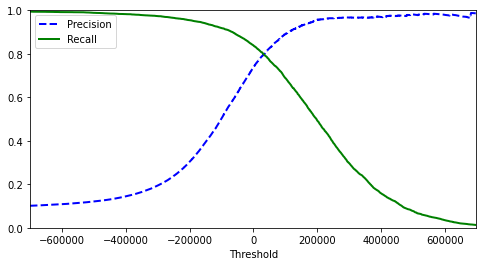

In [ ]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label="Precision", linewidth=2)
  plt.plot(thresholds, recalls[:-1], 'g-', label="Recall", linewidth=2)
  plt.xlabel('Threshold')
  plt.legend(loc='upper left')
  plt.ylim([0,1])

plt.figure(figsize=(8,4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000,700000])
plt.show()


precision may sometimes go
down when you raise the threshold (although in general it will go
up)

# The ROC curve

The **`receiver operating characteristic`** **(ROC)** curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the `ROC curve` plots the **`true positive rate`** (another name
for recall) against the **`false positive rate`**. The **`FPR`** `is the ratio of negative instances that
are incorrectly classified as positive` = **`1 - TNR`**(`ratio of negative instances that are correctly classified as negative`). The
TNR is also called **`specificity`**. Hence the ROC curve plots **`sensitivity`** (recall) versus
`1 – specificity`.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

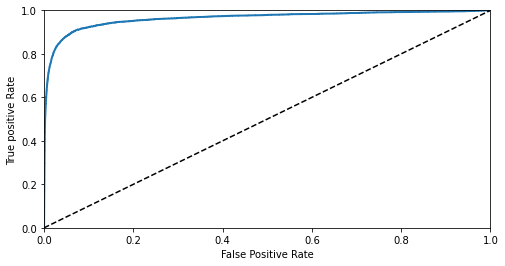

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, label = label, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True positive Rate')

plt.figure(figsize=(8,4))
plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives
(FPR) the classifier produces.

One way to compare classifiers is to measure the **`area under the curve (AUC)`**. A perfect classifier will have a **`ROC AUC`** equal to **1**, whereas a purely random classifier will
have a ROC AUC equal to **0.5**. Scikit-Learn provides a function to compute the ROC
AUC:

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9632544272181544

As a rule
of thumb, you should prefer the PR curve whenever the positive
class is rare or when you care more about the false positives than
the false negatives, and the ROC curve otherwise.

Let’s train a **`RandomForestClassifier`** and compare its `ROC curve` and `ROC AUC score` to the `SGDClassifier`. First, you need to get scores for each instance in the
training set. But due to the way it works, the RandomForestClassi
fier class does not have a `decision_function()` method. Instead it has a **`predict_proba()`** method.

Scikit-Learn classifiers generally have one or the other. The
`predict_proba()` method returns an array containing a row per instance and a column per class, each containing the probability that the given instance belongs to the given class


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method ='predict_proba')
y_probas_forest

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.22, 0.78],
       ...,
       [1.  , 0.  ],
       [0.95, 0.05],
       [1.  , 0.  ]])

In [ ]:
y_probas_forest.shape

(60000, 2)

But to plot a ROC curve, you need scores, not probabilities. A simple solution is to
use the positive class’s probability as the score:

In [ ]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

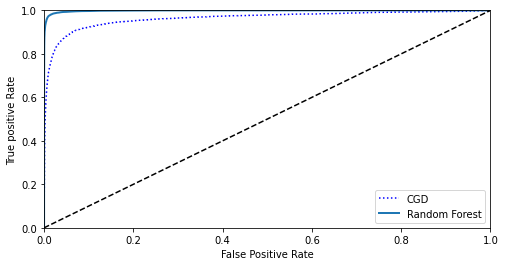

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, 'b:', label="CGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')

plt.show()

In [ ]:
roc_auc_score(y_train_5, y_scores_forest)

0.9984606778213062

# Multiclass Classification

Whereas **`binary classifiers`** distinguish between two classes, **`multiclass classifiers`** (also
called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as `Random Forest classifiers` or `naive Bayes classifiers`) are
capable of handling multiple classes directly. Others (such as `Support Vector Machine
classifiers` or `Linear classifiers`
) are strictly binary classifiers.

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

Under the hood,
Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the
image, and selected the class with the highest score.

To see that you can call the `decision_function()` method.
Instead of returning just one score per instance, it now returns 10 scores, one per
class:

In [ ]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-223459.95645163, -381394.75596041, -353547.6816822 ,
         -72252.38485757, -346806.30273533,  175047.7297338 ,
        -696900.20311933, -260813.31138788, -695088.95618105,
        -585762.1364406 ]])

In [ ]:
max = some_digit_scores.max()
max

175047.7297338042

In [ ]:
indx = np.where(some_digit_scores==max)
indx

(array([0]), array([5]))

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
sgd_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [ ]:
sgd_clf.classes_[5]

5

When a classifier is trained, it stores the list of target classes in its
classes_ attribute, ordered by value

To force ScikitLearn to use `one-versus-one or one-versus-all`, you can use
the **OneVsOneClassifier** or **OneVsRestClassifier** classes. Simply create an instance
and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier:

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [ ]:
len(ovo_clf.estimators_)

45

Training a RandomForestClassifier is just as easy:

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict[some_digit]

This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes.

call
predict_proba() to get the list of probabilities that the classifier assigned to each
instance for each class:

In [ ]:
forest_clf.predict_proba([some_digit])

to evaluate these classifiers use cross-validation. Let’s evaluate the SGDClassifier’s accuracy using the` cross_val_score()`
function:

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.85165, 0.85645, 0.8835 ])

Simply scaling the inputs increases accuracy above
90%:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90735, 0.9069 , 0.91325])

0.9984606778213062

# Error Analysis

Here, we will assume that you have found a promising model and
you want to find ways to improve it. One way to do this is to analyze the types of
errors it makes.

First, you can look at the confusion matrix.

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5730,    3,   23,    9,    9,   46,   51,    8,   39,    5],
       [   2, 6481,   47,   27,    6,   39,    7,   11,  110,   12],
       [  59,   41, 5309,  106,   83,   21,  101,   53,  169,   16],
       [  50,   42,  138, 5343,    2,  227,   32,   55,  136,  106],
       [  23,   26,   35,    8, 5358,    6,   59,   28,   88,  211],
       [  70,   46,   40,  190,   74, 4584,  101,   26,  176,  114],
       [  32,   22,   45,    2,   39,   91, 5645,    3,   39,    0],
       [  20,   21,   73,   28,   55,   10,    6, 5768,   16,  268],
       [  52,  151,   73,  150,   15,  156,   60,   24, 5031,  139],
       [  40,   29,   24,   82,  157,   33,    3,  192,   88, 5301]])

That’s a lot of numbers. It’s often more convenient to look at an image representation
of the confusion matrix, using Matplotlib’s `matshow()` function:

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Multilabel Classification

# Multioutput Classification